<a href="https://colab.research.google.com/github/lokesh28-krish/-Pre-Processing-Images-for-Classification-Algorithms-Using-SIFT-And-SHItomasi/blob/main/REVIEW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: LOKESH K
REGNO:18BCE1239

**SIFT(scale-invariant feature transform)**

In [ ]:
import cv2 as cv
import numpy as np
from math import sqrt,exp
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
%matplotlib inline
uploaded = files.upload()


SIFT is an example of algorithms that OpenCV calls “non-free” modules. These algorithms are patented by their respective creators, and while they are free to use in academic and research settings. Hence they have been removed in latest versions of OpenCV, we install the below versions to use SIFT

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [ ]:
import cv2

image = cv2.imread("/content/IMG_0850.jpg")

training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

In [ ]:
#Function
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

**Pre-Processing**

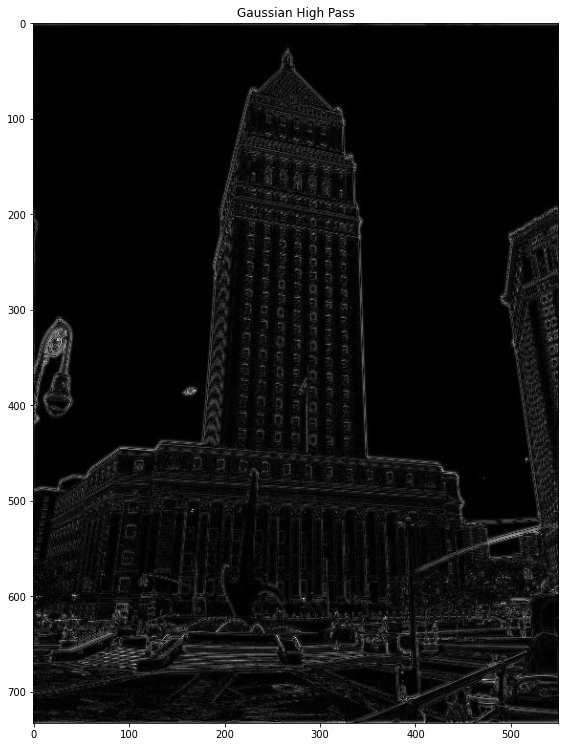

In [ ]:
#Technique 1

original = np.fft.fft2(training_gray)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * gaussianHP(60,training_gray.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

training_gray = np.abs(inverse_HighPass)
training_gray = training_gray.astype('uint8')


In [ ]:
#Technique 2

filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
training_gray = cv2.GaussianBlur(training_gray,(5,5),0)
training_gray=cv2.filter2D(training_gray,-1,filter)

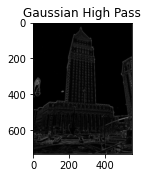

<Figure size 2304x1728 with 0 Axes>

<Figure size 2304x1728 with 0 Axes>

In [ ]:
#Technique 3

HighPassCenter = center * gaussianHP(60,training_gray.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

training_gray = np.abs(inverse_HighPass)
training_gray = training_gray.astype('uint8')

filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
training_gray = cv2.GaussianBlur(training_gray,(5,5),0)
training_gray=cv2.filter2D(training_gray,-1,filter)

original = np.fft.fft2(training_gray)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)


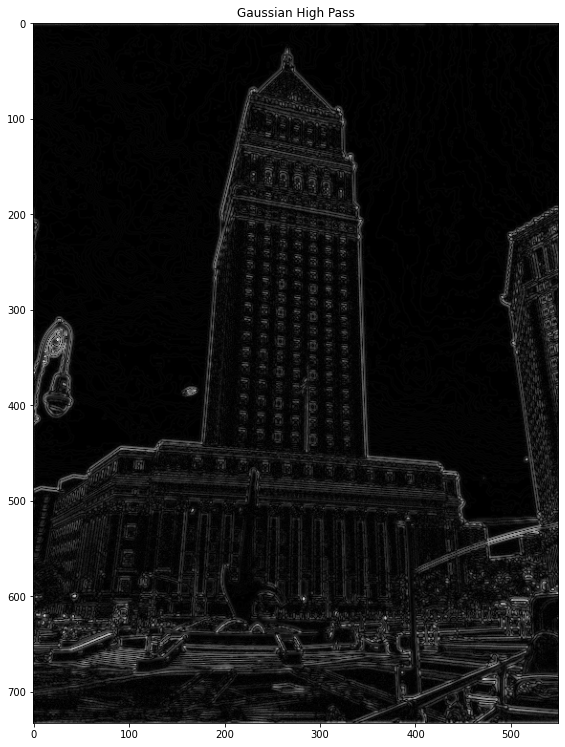

In [ ]:
#Technique 4

filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
training_gray = cv2.GaussianBlur(training_gray,(5,5),0)
training_gray=cv2.filter2D(training_gray,-1,filter)

original = np.fft.fft2(training_gray)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * gaussianHP(60,training_gray.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

training_gray = np.abs(inverse_HighPass)
training_gray = training_gray.astype('uint8')


**Working**

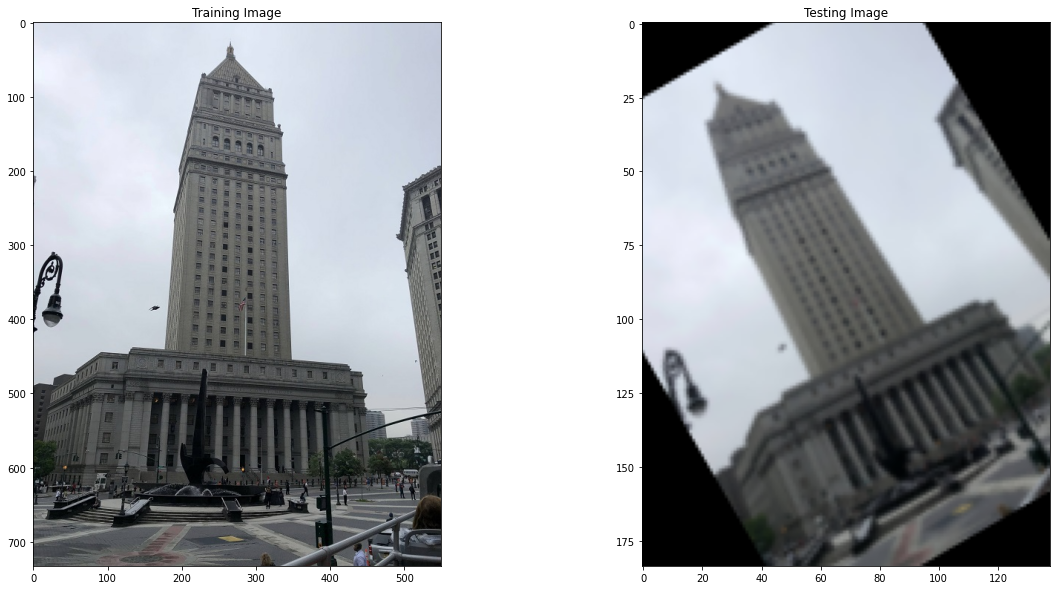

In [ ]:
import cv2

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)
#sift = cv2.xfeatures2d.SIFT_create()
#img_file = sift.detectAndCompute()




**SIFT -** **Keypoints**

Number of Keypoints Detected In The Training Image:  1419
Number of Keypoints Detected In The Query Image:  191


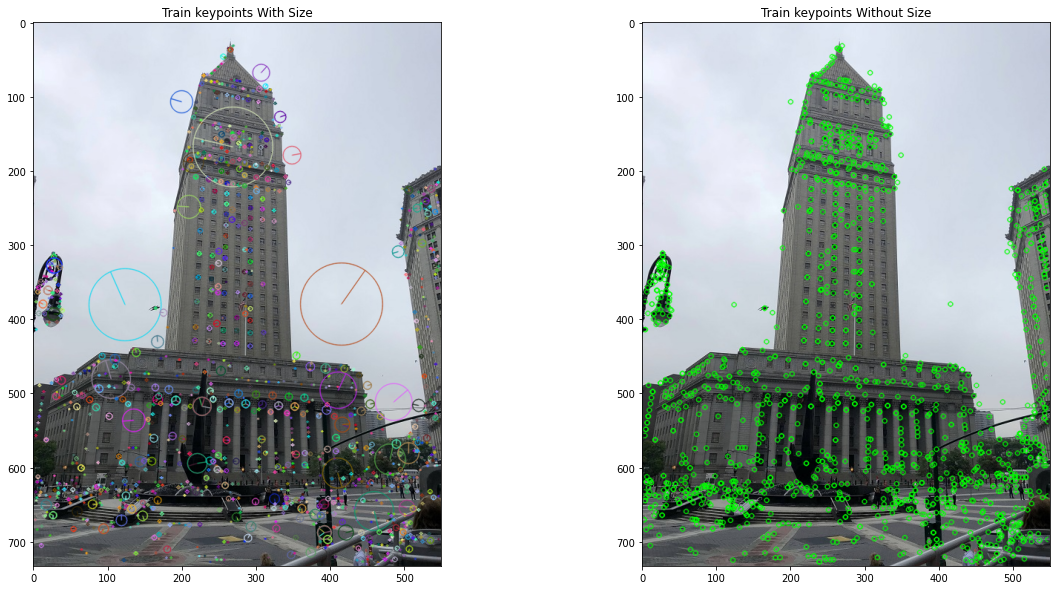

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  344
Number of Keypoints Detected In The Query Image:  191


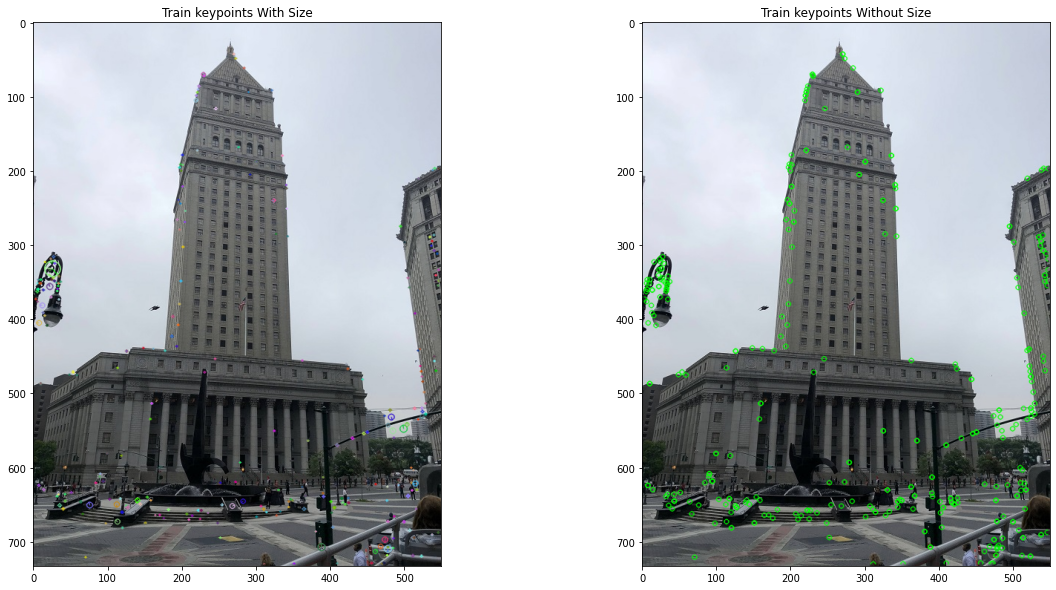

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  7852
Number of Keypoints Detected In The Query Image:  191


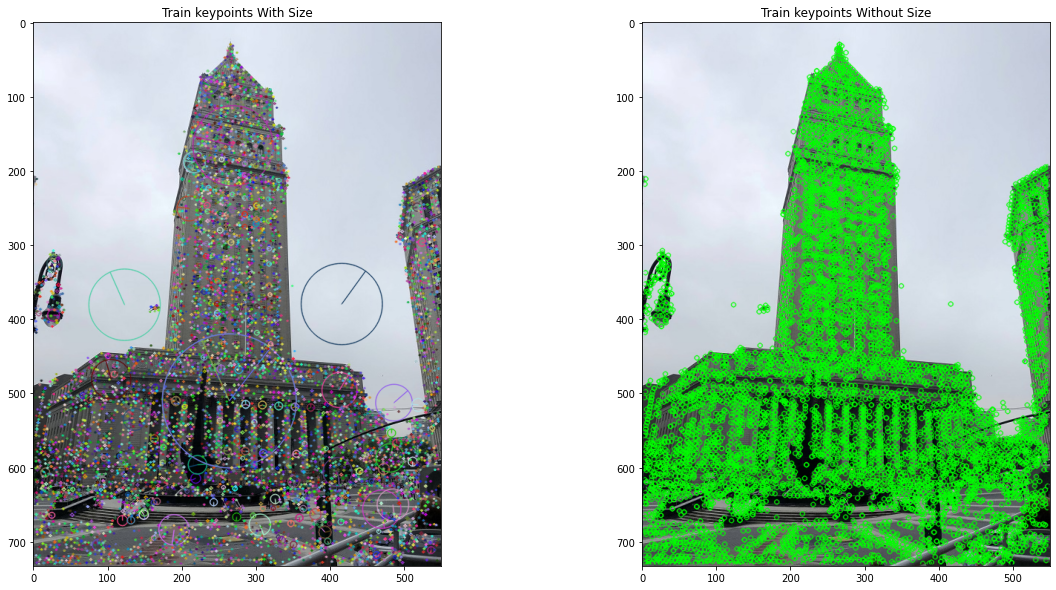

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  3102
Number of Keypoints Detected In The Query Image:  191


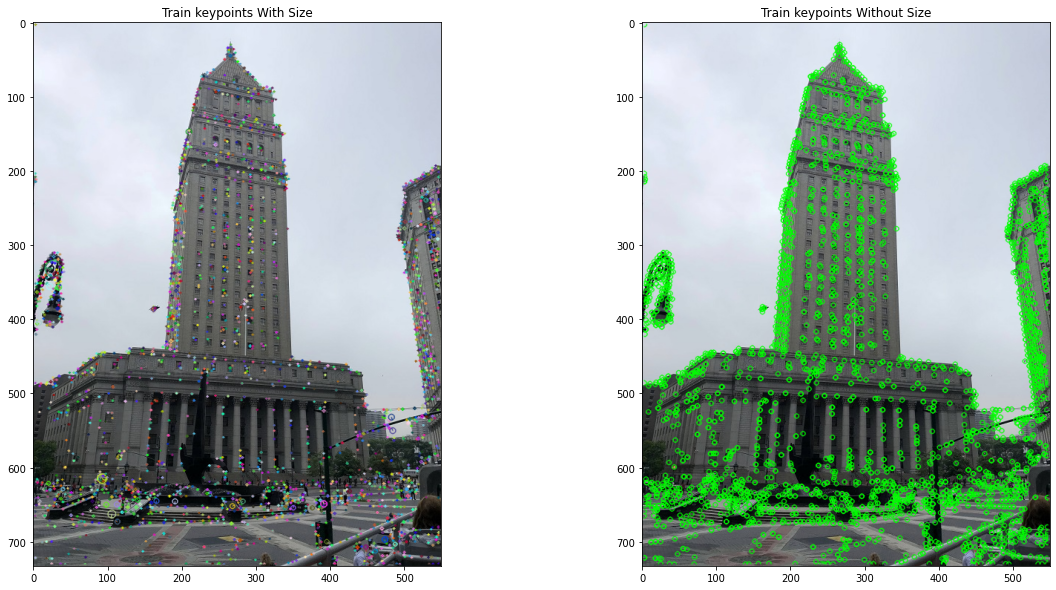

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  669
Number of Keypoints Detected In The Query Image:  191


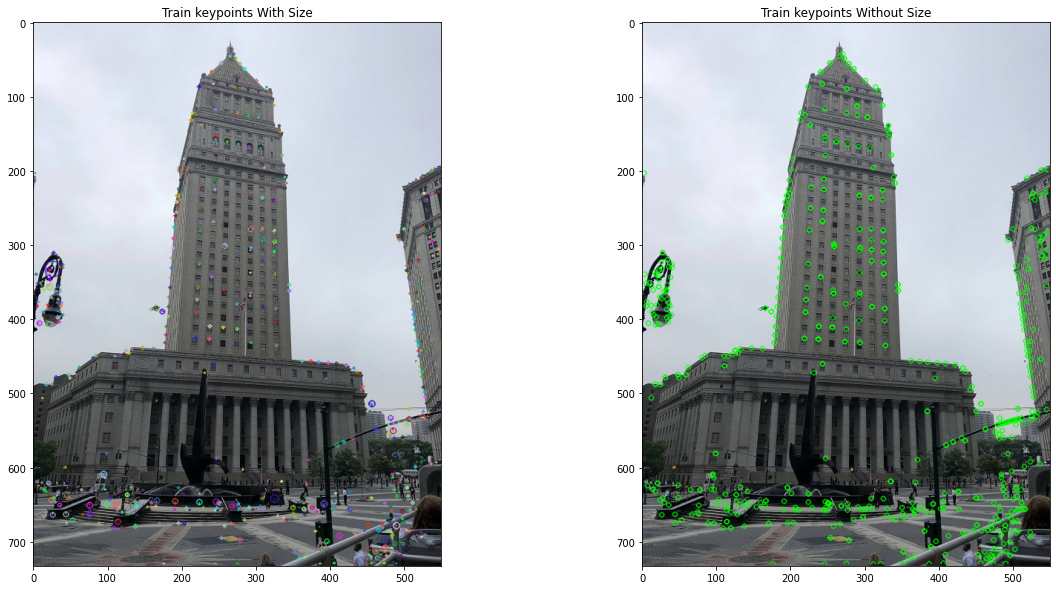

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

**Matcher**

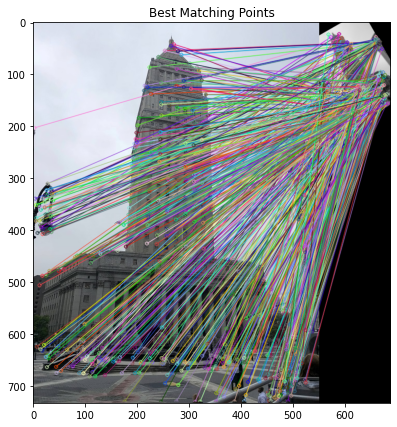


Number of Matching Keypoints Between The Training and Query Images:  669


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# CORNER DETECTION                    

---

Name: LOKESH K

Reg.no: 18BCE1239

# Shi-tomasi 
# Corner Detection : Corners are locations in images where a slight shift in the location will lead to a large change in intensity in both horizontal (X) and vertical (Y) axis.
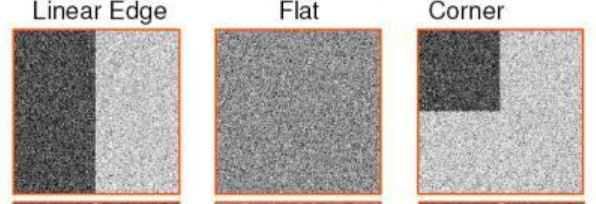

Shi-tomasi 

Corner Detector algorithm in simple words is as follows:

STEP 1. It determines which windows (small image patches) produce very large variations in intensity when moved in both X and Y directions (i.e. gradients).
>
STEP 2. With each such window found, a score R is computed.
>
STEP 3. After applying a threshold to this score, important corners are selected & marked.
>

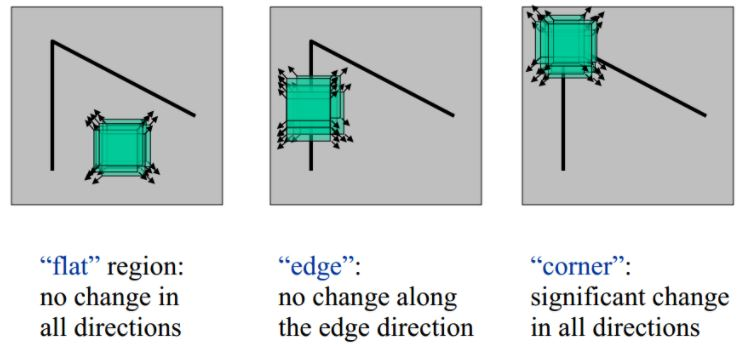

#How do we determine windows which produce large variations?
Window function is either a rectangular window or gaussian window which gives weights to pixels underneath.

Let a window (the center) be located at position (x,y). Let the intensity of the pixel at this location be I(x,y). If this window slightly shifts to a new location with displacement (u,v), the intensity of the pixel at this location will be I(x+u,y+v). Hence [I(x+u,y+v)-I(x,y)] will be the difference in intensities of the window shift. For a corner, this difference will be very high. Hence, we maximize this term by differentiating it with respect to the X and Y axes. Let w(x,y) be the weights of pixels over a window (Rectangular or a Gaussian) Then, E(u,v) is defined as
 
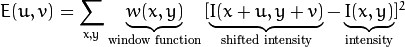
>Weighted sum multiplied by the intensity difference for all pixels in a window [1]

Now, computing E(u,v) by the above formula will be really, really slow. Hence, we use Taylor series expansion (only the 1rst order).
>
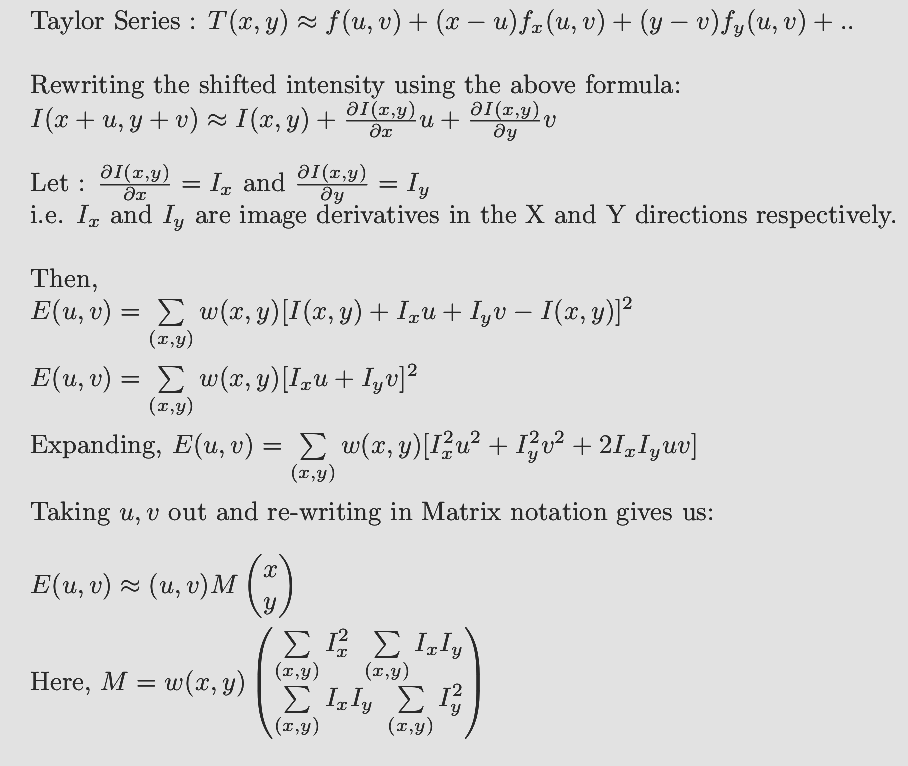



  To find windows with large variations, how do we select the ones with suitable corners?
 
  It was estimated that the eigenvalues of the matrix can be used to do this,because eigen values are used as principal axes,which is easier in linear transformation  . Thus, we calculate a score associated with each such window.
  
**Shi-tomasi R value**
 the score (R) is calculated. This gives a better result. Moreover, in this method, we can find the top N corners, which might be useful in case we don’t want to detect each and every corner. 

 R is calculated by 

image.png

Shi-Tomasi R score

If R is greater than a threshold, its classified as a corner.

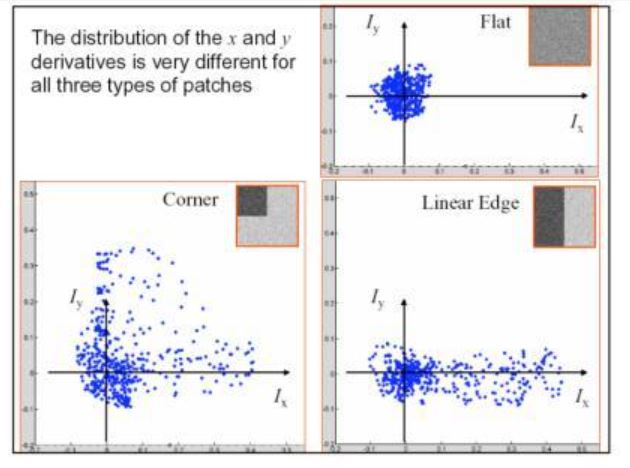

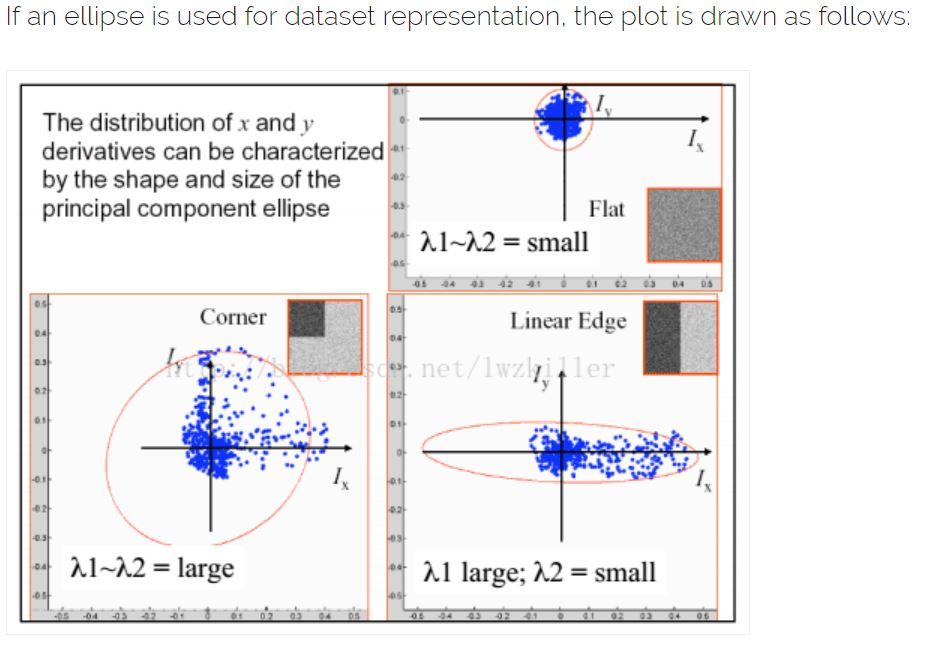


* When |R| is small, which happens when λ1 and λ2 are small, the region is flat.
* When R<0, which happens when λ1>>λ2 or vice versa, the region is an edge.
* When R is large, which happens when λ1 and λ2 are large and λ1∼λ2, the region is a corner.

the smaller of two eigenvalues is greater than the minimum thershold .
λ1 and λ2 are the eigenvalues of M. So the values of these eigenvalues decide whether a region is a corner, edge or flat.








If we plot it in λ1 - λ2 space

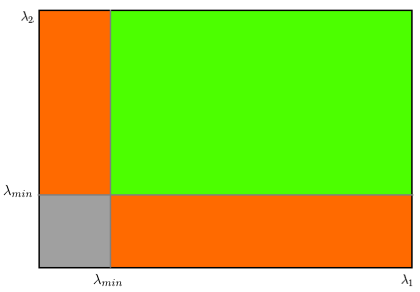

From the picture, we can see only when λ1 and λ2 are larger than the minimum value λmin, it was considered to be a corner point (green).

Python:

**code works for Shi tomasi**


**cv2.goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance)**

It finds N (maxCorners) strongest corners in the image by Shi-Tomasi method.

# Parameters:

img - Input image in grayscale.

maxCorners – Maximum number of corners to return.

qualityLevel – A value between 0-1, which denotes the minimum quality of corner below which everything is rejected. This value is multiplied with the maximum value of R in the image to get the quality measure. Any corner with R less than this quality measure is rejected as a corner.

minDistance – Minimum possible Euclidean distance between the returned corners.

With all these information, the function finds corners in the image. All corners below quality measure are rejected. Then it sorts the remaining corners based on quality in the descending order. Then the function takes the most strongest corner, throws away all the nearby corners in the range of minimum distance and finally returns the N strongest corners in the image.






In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car.jpg to car.jpg
Saving cube.jpg to cube.jpg
Saving 3d.jpg to 3d.jpg
Saving chess.JPG to chess.JPG
Saving abstract.jpg to abstract.jpg
Saving google.jpg to google.jpg


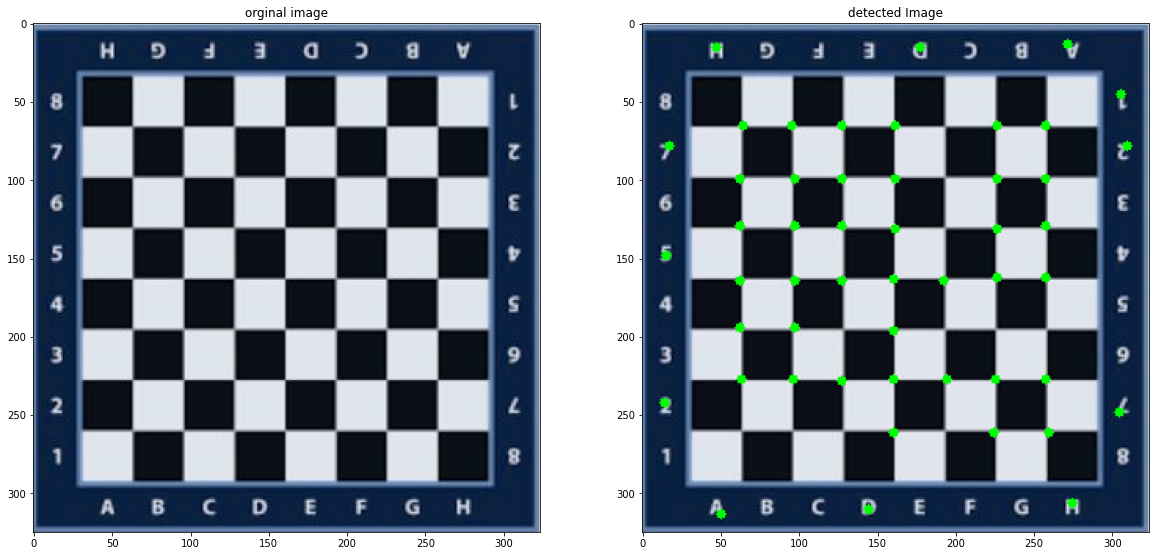

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/chess.JPG')
org = cv2.imread('/content/chess.JPG')

# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 50, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw green color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (0, 255, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image")
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 


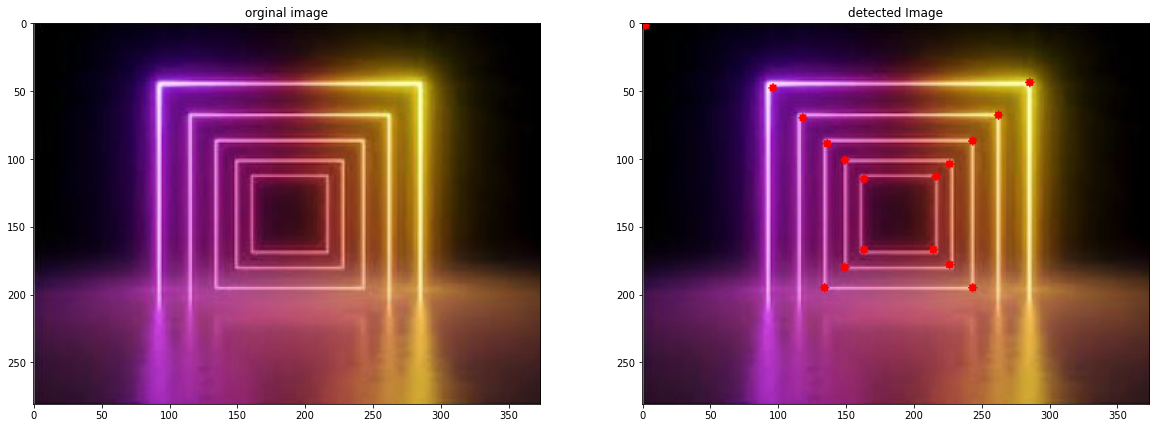

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/3d.jpg') 
org = cv2.imread('/content/3d.jpg') 
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image")
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 

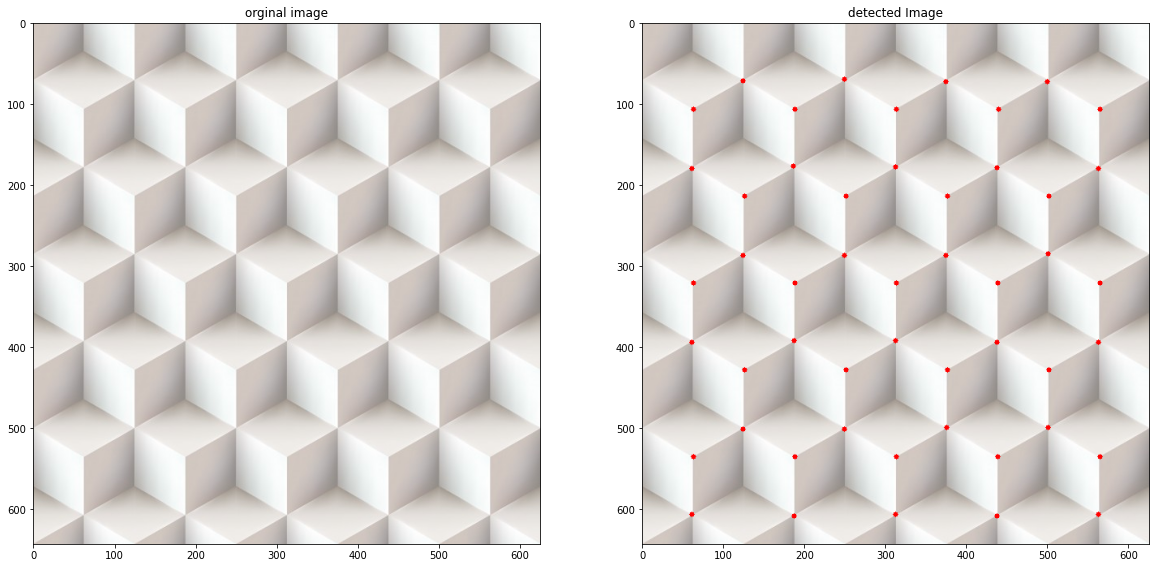

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/abstract.jpg') 
org = cv2.imread('/content/abstract.jpg')
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 50, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image") 
plots[1].imshow(img)


# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 


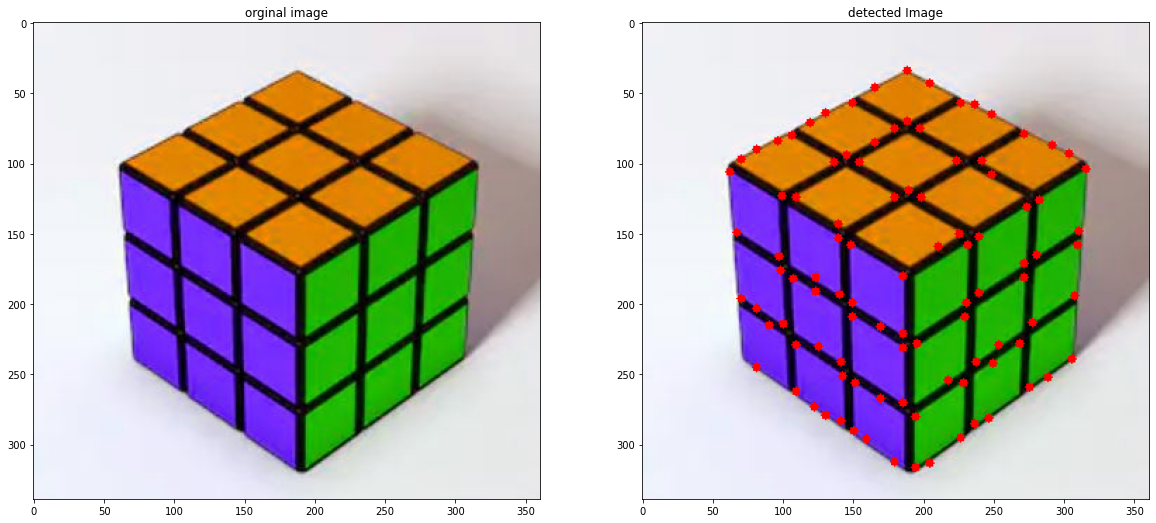

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/cube.jpg') 
org = cv2.imread('/content/cube.jpg')
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

# resulting image 


fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image") 
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows()

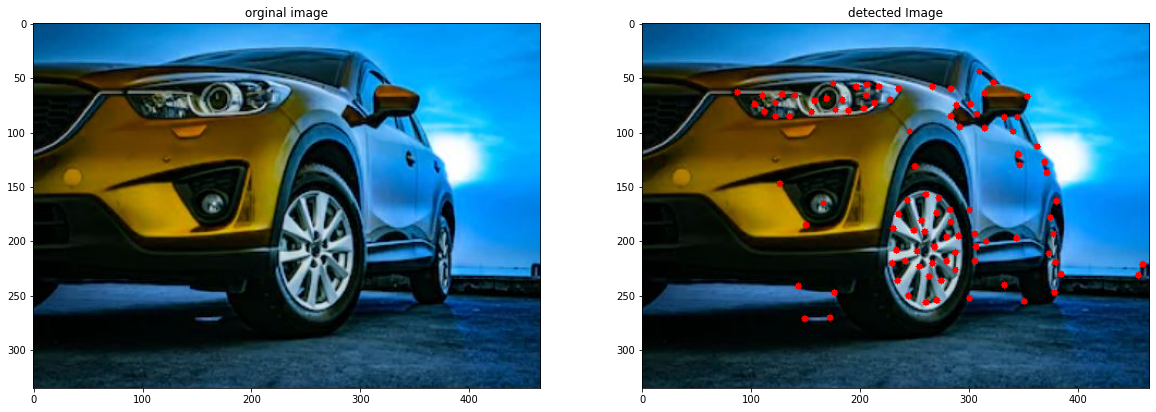

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/car.jpg') 
org = cv2.imread('/content/car.jpg')
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("orginal image")
plots[0].imshow(org) 

plots[1].set_title("detected Image")
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows()

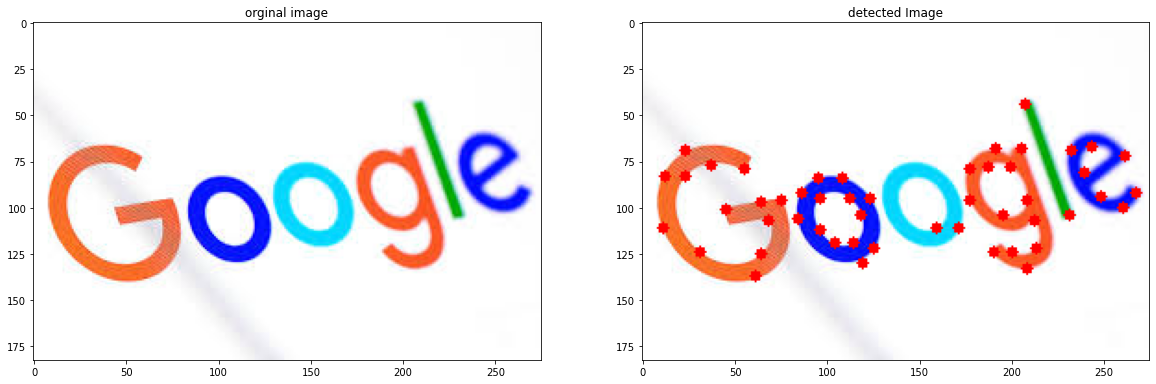

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/google.jpg') 
org = cv2.imread('/content/google.jpg')
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 50, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image")
plots[1].imshow(img)


# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows()

#PREPROCESSING

In [ ]:

#defining  gaussian High Pass filter
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
    

In [ ]:
#deifinig gaussian low pass filter
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

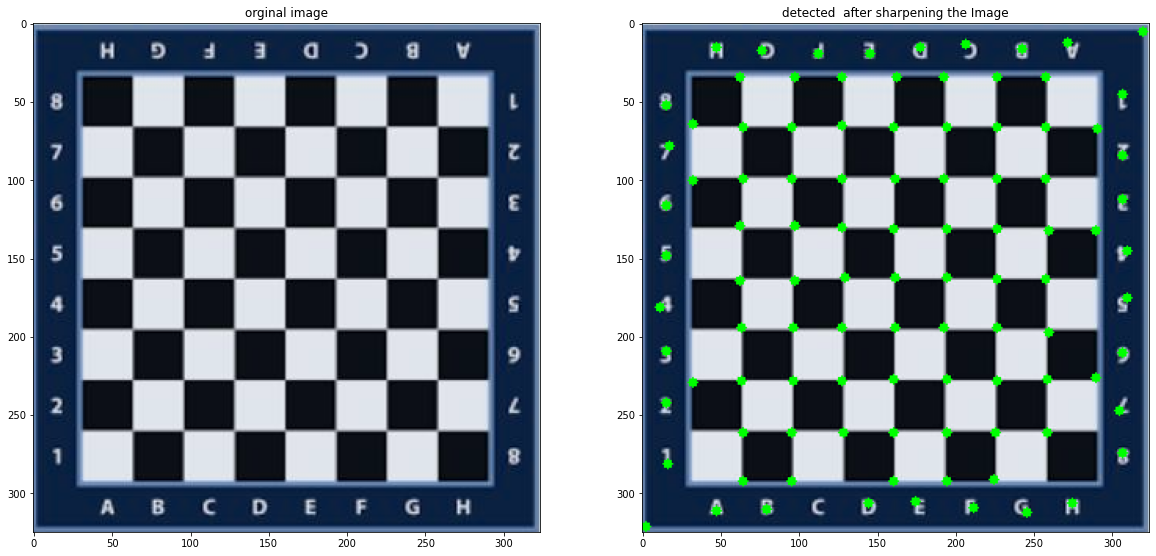

In [ ]:
#import cv2  as cv
import cv2
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline  
from math import sqrt,exp
img = cv2.imread('/content/chess.JPG')
org = cv2.imread('/content/chess.JPG')
#Converting into grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#sharpening the image
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharp = cv2.filter2D(gray_img,-1,filter)

#detecting the corners
corners = cv2.goodFeaturesToTrack(sharp, 100, 0.01, 10)
# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw red color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (0, 255, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 

plots[1].set_title("detected  after sharpening the Image")
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows()

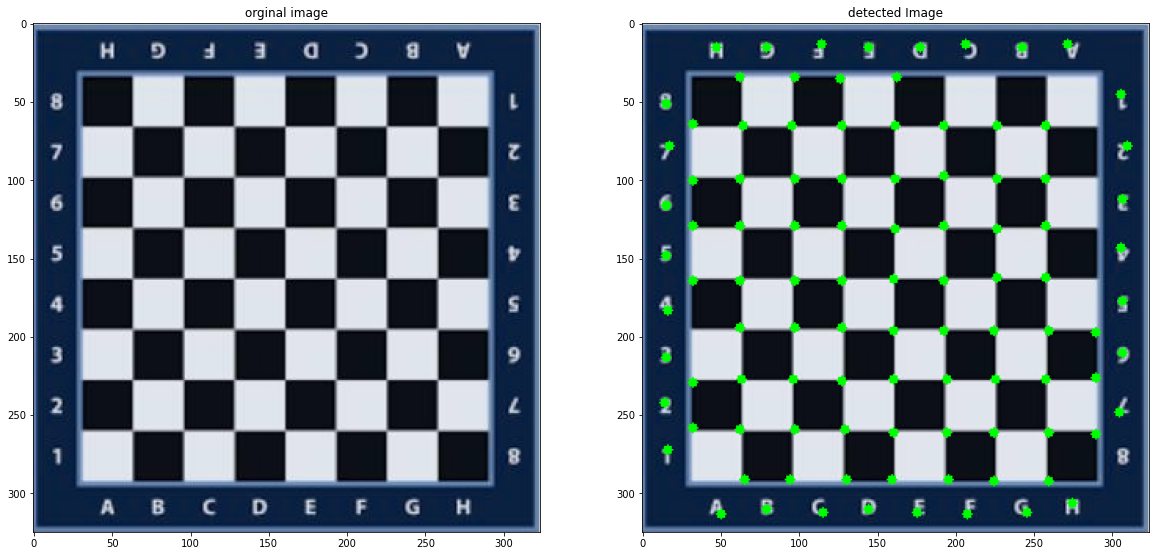

In [ ]:
# Python program to illustrate 
# corner detection with 
# Shi-Tomasi Detection Method 
	
# organizing imports 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

# path to input image specified and 
# image is loaded with imread command 
img = cv2.imread('/content/chess.JPG')
org = cv2.imread('/content/chess.JPG')

# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 



# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 

# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 

# draw green color circles on all corners 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, (0, 255, 0), -1) 

# resulting image 

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("orginal image")
plots[0].imshow(org) 
plots[1].set_title("detected Image")
plots[1].imshow(img)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 
